## Rahul Kumar Goyal (rxg170030) & Varun Kumar Manohara Selvan (vxm170030)
### Project 2

### Cardiac Arrhythmia Multi-Class Classification 

Analyze data and address missing data if there is any. 

Decide aboute a good evaluation strategy and justify your choice. 

Find the best parameters for the following classification models: 
- KNN classifcation 
- Logistic Regression
- Linear Supprt Vector Machine
- Kerenilzed Support Vector Machine
- Decision Tree
- Random Forest 

Then use different bagging and boosting methods to boost the results? Do you see any significant change? Why or why not? 

Next, use data reduction method you have learned in class to reduce the size of data, and agian try above models. Do you get better results? Justify your answer. 

<font color = 'red'>Due date for full credit: April 4, 11:59 PM
    <br>
    Due date for partial credit: April 6, 11:59 PM.
    <br> No submission will be accepted after April 6. 
    <br> Please note that your term paper is also due April 6. 
    </font>

### Import all the required libraries and dataset

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

from sklearn import linear_model, decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings; warnings.simplefilter('ignore')

Read the Dataset. There are no column names in the dataset

In [18]:
df = pd.read_csv('cardiac_arrhythmia.csv', header=None, na_values=['?'])

Column names were made into a list by taking information from the metadata document

In [19]:
colnames = ["Age", "Gender", "Height", "Weight", "QRS_Duration", "PR_Interval",
           "QT_Interval","T_Interval","P_Interval"]
for name in ["QRS","T","P","QRST","J"]:
    colnames.append("VectorAngle_"+name)

colnames.append("HeartRate")

channels = ["DI","DII","DIII","AVR","AVL","AVF","V1","V2","V3","V4","V5","V6"]
channel_specs_1 = ["QWidth","RWidth","SWidth","RPWidth","SPWidth","NumDeflections",
                 "ExistRagR","ExistDiaR","ExistRagP","ExistDiaP","ExistRagT","ExistDiaT"]
channel_specs_2 = ["AmpJJ","AmpQ","AmpR","AmpS","AmpRP",
                 "AmpSP","AmpP","AmpT","QRSA","QRSTA"]

for channel in channels:
    for spec in channel_specs_1:
        colnames.append(channel+"_"+spec)

for channel in channels:
    for spec in channel_specs_2:
        colnames.append(channel+"_"+spec)

colnames.append("Target")

#Seperate Nominal and Linear columns for future
channel_spec = ["ExistRagR","ExistDiaR","ExistRagP","ExistDiaP","ExistRagT","ExistDiaT"]
channels = ["DI","DII","DIII","AVR","AVL","AVF","V1","V2","V3","V4","V5","V6"]

NominalCols = ["Gender"]

for channel in channels:
    for spec in channel_spec:
        NominalCols.append(channel+"_"+spec)

LinearCols = [i for i in colnames if i not in NominalCols]

LinearCols = LinearCols[:-1] #Remove the "Target" column from LinearCols

Rename the column names in df to the colnames list created

In [20]:
df.columns = colnames

In [21]:
df.head()

,Age,Gender,Height,Weight,QRS_Duration,PR_Interval,QT_Interval,T_Interval,P_Interval,VectorAngle_QRS,...,V6_AmpQ,V6_AmpR,V6_AmpS,V6_AmpRP,V6_AmpSP,V6_AmpP,V6_AmpT,V6_QRSA,V6_QRSTA,Target
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


### Missing values imputation

See the number of missing values in each column.

In [22]:
print(np.array(df.isnull().sum()))
print(df.shape)

[  0   0   0   0   0   0   0   0   0   0   8  22   1 376   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In the cell below, missing values are filled using average for linear columns. For nominal columns there are no missing values.

In [23]:
df = df.fillna(df.mean())

### Data Cleaning

1) Check to see if the nominal columns have more than 2 values. If there are we might want to convert them to one_hot.<br>
2) Print the columns which have only one value as they will be of no use in the analysis

In [24]:
#Check number of unique values in nominal columns to see if it is required to convert any to one_hot
#Next check linear columns which only have one unique values

print('Nominal Columns')
for col in NominalCols:
    if len(df[col].unique()) != 2:
        print("Unique values in "+col+" column are: ",end="")
        print(df[col].unique())
        
print('\n')
print('Linear Columns')
for col in LinearCols:
    if len(df[col].unique()) == 1:
        print("Unique values in "+col+" column are: ",end="")
        print(df[col].unique())

Nominal Columns
Unique values in AVL_ExistRagR column are: [0]
Unique values in AVF_ExistRagP column are: [0]
Unique values in V4_ExistRagP column are: [0]
Unique values in V4_ExistDiaP column are: [0]
Unique values in V5_ExistRagR column are: [0]
Unique values in V5_ExistRagP column are: [0]
Unique values in V5_ExistRagT column are: [0]
Unique values in V6_ExistDiaP column are: [0]
Unique values in V6_ExistRagT column are: [0]


Linear Columns
Unique values in DI_SPWidth column are: [0]
Unique values in AVL_SPWidth column are: [0]
Unique values in V5_SPWidth column are: [0]
Unique values in V6_SPWidth column are: [0]
Unique values in DI_AmpSP column are: [0]
Unique values in AVL_AmpSP column are: [0]
Unique values in V5_AmpSP column are: [0]
Unique values in V6_AmpSP column are: [0]


1) No nominal columns have more than 2 values. So we don't have to convert any column to one hot. <br>
2) Few nominal and linear columns have only one value so remove them and update the NominalCols and LinearCols list.

In [25]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, inplace=True, axis=1)

#Update the nominal and linear columns list
NominalCols = [i for i in NominalCols if i in df.columns]
LinearCols = [i for i in LinearCols if i in df.columns]

### Modeling

Models built will be<br>
1) Logistic Regression (Multinomial and OneVersusRest)<br>
2) Support Vector Classifier (linear and rbf kernels)<br>
3) Decision Tree Classifier<br>
4) Random Forests<br>
5) K Nearest Neighbors<br>
6) Gradient Boosting Classifier<br>

Seperate the features and target in the dataset and do min max scaling

In [26]:
X = df[df.columns[:-1]]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify = y)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.fit_transform(X)

A few helper functions are used for the analysis.<br>
1) **multiclass_roc_auc_score**: Scikit learn's roc and auc functions do the work only for binary classfication problem, this function calculates the AUC for the multiclass classification problem we have<br>
2) **var_imp_plot**: This function plots the important variables for the different models that we plot <br>
3) **print_grid_search**: This function plots few metrics from grid search of use to us<br>
4) **print_model_scores**: This functions prints a few results we want from a model like classification report etc.

In [27]:
def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return(roc_auc_score(truth, pred, average=average))

def var_imp_plot(model, df = df):
    
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    
    column_names = df.columns[:-1]

    imp = list(zip(column_names, feature_importance))
    x = sorted(imp, reverse=True, key= lambda x: x[1])[0:20][::-1]

    sorted_idx = np.argsort(feature_importance)[0:20]
    pos = np.arange(sorted_idx.shape[0])+0.5

    plt.subplot(1, 2, 2)
    plt.barh(pos, [a[1] for a in x], align='center')
    plt.yticks(pos, [a[0] for a in x])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
def print_grid_search(grid_search):
    
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    print( "Best estimator:\n{}".format(grid_search.best_estimator_))
    
def print_model_scores(model, y_test = y_test, X_test_scaled = X_test_scaled, X_train_scaled = X_train_scaled, y_train = y_train):
    
    y_predicted = model.predict(X_test_scaled)
    
    print("training score : %.4f " % (model.score(X_train_scaled, y_train)))
    print("testing score : %.4f " % (model.score(X_test_scaled, y_test)))
    
    print("Testing report :")
    print(classification_report(y_test, y_predicted))
    
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_predicted))
    
    print("AUC: {:.4f}".format(multiclass_roc_auc_score(y_test, y_predicted)))

##### The model building process for each model will be as follows:
###### 1) Do Grid Search on each model to find the best estimator 
###### 2) Use the best estimator to build that specific model
###### 3) Bagging and Boosting (if applicable) the best estimator to try and get better results 
###### 4) Decide the best model based on the maximum accuracy and maximum roc

Grid Search to find the best value for C in both the Multionomial and One Versus Rest

In [28]:
param_grid = {'C':[0.1,0.5,1,2,5,10]}

for multi_class in ('multinomial', 'ovr'):
    grid_search = GridSearchCV(linear_model.LogisticRegression(solver='sag', random_state=1, multi_class=multi_class),
                               param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

    grid_search.fit(X_train_scaled, y_train)
    
    print(multi_class)
    print_grid_search(grid_search)

multinomial
Best parameters: {'C': 1}
Best cross-validation score: 0.68
Best estimator:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=1, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)
ovr
Best parameters: {'C': 0.5}
Best cross-validation score: 0.68
Best estimator:
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)


Build the multiclass logistic regression model for multinomial and one versus rest

In [29]:
for multi_class, c in [('multinomial',1), ('ovr', 0.5)]:
    clf = linear_model.LogisticRegression(solver='sag', random_state=1, C = c,
                             multi_class=multi_class).fit(X_train_scaled, y_train)

    # print the training scores
    print(multi_class)
    print_model_scores(model = clf)

multinomial
training score : 0.8344 
testing score : 0.7200 
Testing report :
             precision    recall  f1-score   support

          1       0.70      0.99      0.82        81
          2       0.75      0.40      0.52        15
          3       1.00      1.00      1.00         5
          4       0.50      0.40      0.44         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.67      0.80         3
         10       0.81      0.76      0.79        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.61      0.72      0.65       150

Confusion matrix: 
[[80  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 8  6  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  5  0  0  0  

Boosting and Bagging both the models

In [30]:
print("Bagging")
for multi_class, c in [('multinomial',1), ('ovr', 0.5)]:
    clf = BaggingClassifier(linear_model.LogisticRegression(solver='sag', random_state=1, C = c,
                             multi_class=multi_class)).fit(X_train_scaled, y_train)

    # print the training scores
    print(multi_class)
    print_model_scores(model = clf)
    
print("AdaBoost")
for multi_class, c in [('multinomial',1), ('ovr', 0.5)]:
    clf = AdaBoostClassifier(linear_model.LogisticRegression(solver='sag', random_state=1, C = c,
                             multi_class=multi_class)).fit(X_train_scaled, y_train)

    # print the training scores
    print(multi_class)
    print_model_scores(model = clf)

Bagging
multinomial
training score : 0.8013 
testing score : 0.7067 
Testing report :
             precision    recall  f1-score   support

          1       0.69      0.99      0.81        81
          2       0.60      0.40      0.48        15
          3       1.00      1.00      1.00         5
          4       0.60      0.60      0.60         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.33      0.50         3
         10       0.85      0.65      0.73        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.60      0.71      0.63       150

Confusion matrix: 
[[80  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 8  6  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  5  0

Grid Search on Support Vector Classifier to find best values for C using a linear kernel

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel = 'linear', random_state = 1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_scaled, y_train)

print_grid_search(grid_search)

Best parameters: {'C': 1}
Best cross-validation score: 0.68
Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


Build linear SVC using the best parameters

In [32]:
svc = SVC(C=1, kernel='linear', random_state=1).fit(X_train_scaled, y_train)

print_model_scores(model = svc)

training score : 0.9238 
testing score : 0.7200 
Testing report :
             precision    recall  f1-score   support

          1       0.71      0.96      0.82        81
          2       0.88      0.47      0.61        15
          3       1.00      1.00      1.00         5
          4       0.50      0.80      0.62         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.67      0.80         3
         10       0.83      0.59      0.69        17
         14       0.50      1.00      0.67         1
         15       1.00      0.50      0.67         2
         16       0.00      0.00      0.00         7

avg / total       0.65      0.72      0.66       150

Confusion matrix: 
[[78  1  0  1  0  0  0  0  0  1  0  0  0]
 [ 8  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

Bagging and boosting linear kernel

In [34]:
svc = BaggingClassifier(SVC(C=1, kernel='linear', random_state=1)).fit(X_train_scaled, y_train)

print_model_scores(svc)

training score : 0.7450 
testing score : 0.6333 
Testing report :
             precision    recall  f1-score   support

          1       0.68      0.99      0.80        81
          2       0.86      0.40      0.55        15
          3       1.00      1.00      1.00         5
          4       0.57      0.80      0.67         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.50      0.63      0.54       150

Confusion matrix: 
[[80  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 8  6  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

Grid Search on Support Vector Classifier to find best values for C and gamma using a rbf kernel

In [35]:
param_grid = {'C': [1, 10, 100, 200, 400, 500],
              'gamma': [0.001, 0.01, 0.05, 0.1]}

grid_search = GridSearchCV(SVC(kernel = 'rbf', random_state = 1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_scaled, y_train)

print_grid_search(grid_search)

Best parameters: {'C': 10, 'gamma': 0.05}
Best cross-validation score: 0.70
Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


Build radial kernel SVM using the best parameters

In [36]:
svc = SVC(C=10, gamma=0.05, kernel='rbf', random_state=1).fit(X_train_scaled, y_train)

print_model_scores(model = svc)

training score : 0.9305 
testing score : 0.7067 
Testing report :
             precision    recall  f1-score   support

          1       0.70      0.95      0.81        81
          2       0.78      0.47      0.58        15
          3       1.00      1.00      1.00         5
          4       0.67      0.80      0.73         5
          5       0.00      0.00      0.00         4
          6       1.00      0.12      0.22         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.67      0.80         3
         10       0.75      0.53      0.62        17
         14       1.00      1.00      1.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.68      0.71      0.66       150

Confusion matrix: 
[[77  0  0  1  0  0  0  0  0  1  0  0  2]
 [ 7  7  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

Bagging and boosting SVC with rbf kernel

In [37]:
svc = BaggingClassifier(SVC(C=10, gamma=0.05, kernel='rbf', random_state=1)).fit(X_train_scaled, y_train)

print_model_scores(svc)

training score : 0.8278 
testing score : 0.6667 
Testing report :
             precision    recall  f1-score   support

          1       0.66      0.98      0.79        81
          2       0.55      0.40      0.46        15
          3       0.83      1.00      0.91         5
          4       1.00      0.80      0.89         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.67      0.67      0.67         3
         10       1.00      0.24      0.38        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.60      0.67      0.59       150

Confusion matrix: 
[[79  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

Grid Search on Decision Tree to find best estimator

In [38]:
param_grid = {'max_depth': np.arange(3, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_scaled, y_train)

print_grid_search(grid_search)

Best parameters: {'max_depth': 8}
Best cross-validation score: 0.66
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


Building Decision Tree using best estimator

In [39]:
dt = DecisionTreeClassifier(max_depth = 8, random_state=1).fit(X_train_scaled, y_train)

print_model_scores(dt)

training score : 0.9205 
testing score : 0.6600 
Testing report :
             precision    recall  f1-score   support

          1       0.69      0.90      0.78        81
          2       0.50      0.27      0.35        15
          3       0.80      0.80      0.80         5
          4       0.50      0.40      0.44         5
          5       1.00      0.50      0.67         4
          6       1.00      0.38      0.55         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.33      0.50         3
         10       0.45      0.53      0.49        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       1.00      0.14      0.25         7

avg / total       0.66      0.66      0.62       150

Confusion matrix: 
[[73  1  0  0  0  0  0  0  0  7  0  0  0]
 [ 7  4  0  2  0  0  0  0  0  2  0  0  0]
 [ 0  1  4  0  0  0  0  0  0  0  

Bagging and boosting decision tree classifier

Bagging
training score : 0.9470 
testing score : 0.7200 
Testing report :
             precision    recall  f1-score   support

          1       0.72      0.94      0.81        81
          2       0.73      0.53      0.62        15
          3       0.80      0.80      0.80         5
          4       1.00      0.40      0.57         5
          5       0.67      0.50      0.57         4
          6       1.00      0.62      0.77         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.67      0.80         3
         10       0.56      0.53      0.55        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.67      0.72      0.68       150

Confusion matrix: 
[[76  1  0  0  0  0  0  0  0  4  0  0  0]
 [ 6  8  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  4  0  0  0  0  0

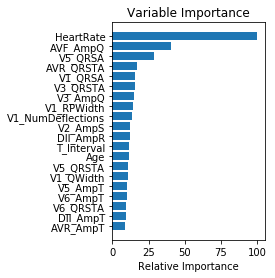

In [40]:
dt = BaggingClassifier(DecisionTreeClassifier(max_depth = 8, random_state=1)).fit(X_train_scaled, y_train)

print("Bagging")
print_model_scores(dt)

dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 8, random_state=1)).fit(X_train_scaled, y_train)

print("Boosting")
print_model_scores(dt)
var_imp_plot(dt)

Grid Search on RandomForest to find best estimator

In [41]:
param_grid = {"n_estimators": [200, 500, 700]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid,
                           cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_scaled, y_train)

print_grid_search(grid_search)

Best parameters: {'n_estimators': 700}
Best cross-validation score: 0.69
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


Building model using random forest

training score : 1.0000 
testing score : 0.7400 
Testing report :
             precision    recall  f1-score   support

          1       0.71      0.98      0.82        81
          2       0.73      0.53      0.62        15
          3       0.83      1.00      0.91         5
          4       1.00      0.80      0.89         5
          5       0.00      0.00      0.00         4
          6       1.00      0.25      0.40         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.67      0.80         3
         10       0.85      0.65      0.73        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.68      0.74      0.68       150

Confusion matrix: 
[[79  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 7  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

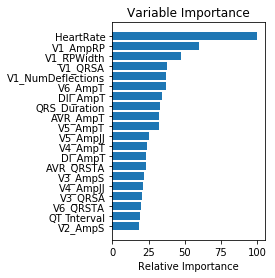

In [42]:
rf_clf = RandomForestClassifier(random_state=1,
                                n_estimators = 700).fit(X_train_scaled, y_train)

print_model_scores(rf_clf)

var_imp_plot(rf_clf)

Using Grid Search or CV for Gradientboosting to find best estimator

In [43]:
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
             'max_depth':[3, 5, 9]}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_scaled, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best parameters: {'learning_rate': 0.01, 'max_depth': 5}
Best cross-validation score: 0.71
Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)


Build model using the best model in GradientBoosting

training score : 0.9901 
testing score : 0.7200 
Testing report :
             precision    recall  f1-score   support

          1       0.75      0.94      0.83        81
          2       0.75      0.60      0.67        15
          3       0.83      1.00      0.91         5
          4       0.67      0.40      0.50         5
          5       0.00      0.00      0.00         4
          6       1.00      0.50      0.67         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.67      0.67      0.67         3
         10       0.69      0.53      0.60        17
         14       0.00      0.00      0.00         1
         15       0.50      0.50      0.50         2
         16       0.00      0.00      0.00         7

avg / total       0.68      0.72      0.69       150

Confusion matrix: 
[[76  1  0  0  0  0  0  0  0  1  1  0  2]
 [ 3  9  0  0  0  0  0  0  1  2  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

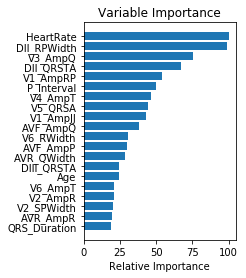

In [44]:
gb_clf = GradientBoostingClassifier(learning_rate = 0.01,max_depth = 5,random_state = 1).fit(X_train_scaled, y_train)

print_model_scores(gb_clf)

var_imp_plot(gb_clf)

Bagging and boosting XGBoost

training score : 0.9735 
testing score : 0.7667 
Testing report :
             precision    recall  f1-score   support

          1       0.75      0.99      0.86        81
          2       0.91      0.67      0.77        15
          3       0.83      1.00      0.91         5
          4       0.75      0.60      0.67         5
          5       0.00      0.00      0.00         4
          6       1.00      0.75      0.86         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.67      0.80         3
         10       0.69      0.53      0.60        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.70      0.77      0.72       150

Confusion matrix: 
[[80  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 4 10  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  

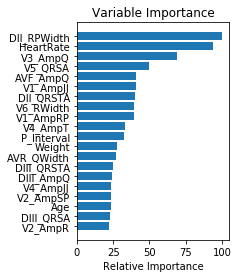

In [45]:
gb_clf = BaggingClassifier(GradientBoostingClassifier(learning_rate = 0.01,
                                                      max_depth = 5,random_state = 1)).fit(X_train_scaled, y_train)

print_model_scores(gb_clf)

gb_clf = AdaBoostClassifier(GradientBoostingClassifier(learning_rate = 0.01,
                                                       max_depth = 5,random_state = 1)).fit(X_train_scaled, y_train)

print_model_scores(gb_clf)
var_imp_plot(gb_clf)

Using Grid Search for finding best KNN estimator

In [46]:
knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors':[1, 2, 4, 5, 10]}

grid_search = GridSearchCV(knn_clf , param_grid, cv = StratifiedKFold(5, shuffle = True, random_state = 1),
                               scoring = new_score,return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

print_grid_search(grid_search)
print("CV results: ", end="")
print(grid_search.cv_results_)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.58
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
CV results: {'mean_fit_time': array([ 0.00571828,  0.00249581,  0.00191245,  0.00210528,  0.00290685]), 'std_fit_time': array([ 0.00154108,  0.00054824,  0.0002047 ,  0.00049089,  0.00097192]), 'mean_score_time': array([ 0.02195749,  0.00822883,  0.00802794,  0.00802169,  0.01243372]), 'std_score_time': array([ 0.00518933,  0.00111887,  0.00089434,  0.00031711,  0.00374385]), 'param_n_neighbors': masked_array(data = [1 2 4 5 10],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 10}], 'split0_test_score': array([ 0.57142857,  0.55555556,  0.50793651,  0.55555556,  0.53968254]), 'split1_test_score': array([ 0

Build model using the best model in KNN

In [47]:
knn_clf = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)

print_model_scores(model=knn_clf)

training score : 0.6523 
testing score : 0.5933 
Testing report :
             precision    recall  f1-score   support

          1       0.58      0.95      0.72        81
          2       0.33      0.07      0.11        15
          3       1.00      0.80      0.89         5
          4       1.00      0.40      0.57         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.33      0.50         3
         10       1.00      0.24      0.38        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.55      0.59      0.50       150

Confusion matrix: 
[[77  1  0  0  0  3  0  0  0  0  0  0  0]
 [14  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  1  0  0  0  0  

In [48]:
knn_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5)).fit(X_train_scaled, y_train)

print_model_scores(model=knn_clf)

training score : 0.6589 
testing score : 0.5800 
Testing report :
             precision    recall  f1-score   support

          1       0.59      0.93      0.72        81
          2       0.25      0.07      0.11        15
          3       1.00      0.80      0.89         5
          4       1.00      0.20      0.33         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.33      0.50         3
         10       1.00      0.29      0.45        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.54      0.58      0.50       150

Confusion matrix: 
[[75  2  0  0  0  4  0  0  0  0  0  0  0]
 [14  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  1  0  0  0  0  

As we can see most of the models here are overfitting the training data. This is also a multiclass classification problem so we have taken AUC as the measure to select few best models. We can reduce a little complexity on those data to give a goodfit instead of the overfit which we have now. The best models considering AUC as the scoring criteria are as follows:<br>
1) **SVC with linear and rbf kernels** (AUC ~ 71 and 68)<br>
2) **GradientBoosting with Bagging and Boosting** (AUC ~ 70 and 69)<br>
3) **Decision tree with Bagging** (AUC ~ 71)

In [49]:
pca = decomposition.PCA(n_components=220)
X_pca = pca.fit_transform(X)

X_pca_inv = pca.inverse_transform(X_pca)

print("Variance lost is: ",end="")
print(np.mean(np.sum(np.square(X_pca_inv - X), axis=1))*100, end="")
print("%")

print("Sum of explained variance is: ", end="")
print(np.sum(pca.explained_variance_ratio_)*100,end="")
print("%")

Variance lost is: 2.17418271421625%
Sum of explained variance is: 99.999950772%


Splitting the train and test set after pca for model building

In [50]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=1, stratify = y)

Grid Seeach on SVC linear kernel to find best parameters

In [51]:
param_grid = {'C': [0.1, 1, 10, 100, 200, 500]}

grid_search = GridSearchCV(SVC(kernel = 'linear', random_state = 1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_pca, y_train)

print_grid_search(grid_search)

Best parameters: {'C': 0.1}
Best cross-validation score: 0.68
Best estimator:
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


Building SVC using best parameters

In [52]:
svc = SVC(C=0.1, kernel='linear', random_state=1).fit(X_train_pca, y_train)

print_model_scores(model = svc, X_test_scaled=X_test_pca, X_train_scaled = X_train_pca)

training score : 1.0000 
testing score : 0.6133 
Testing report :
             precision    recall  f1-score   support

          1       0.72      0.80      0.76        81
          2       0.40      0.27      0.32        15
          3       1.00      1.00      1.00         5
          4       0.38      0.60      0.46         5
          5       0.00      0.00      0.00         4
          6       0.44      0.50      0.47         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      1.00      1.00         3
         10       0.58      0.41      0.48        17
         14       0.00      0.00      0.00         1
         15       1.00      0.50      0.67         2
         16       0.00      0.00      0.00         7

avg / total       0.60      0.61      0.60       150

Confusion matrix: 
[[65  2  0  2  2  3  0  0  0  2  0  0  5]
 [ 7  4  0  0  0  1  0  0  0  1  0  0  2]
 [ 0  0  5  0  0  0  0  0  0  0  

Grid search on SVC with rbf kernel to find best parameters

In [53]:
param_grid = {'C': [1, 10, 100, 200, 400, 500],
              'gamma': [0.0001, 0.005, 0.001, 0.01]}

grid_search = GridSearchCV(SVC(kernel = 'rbf', random_state = 1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_pca, y_train)

print_grid_search(grid_search)

Best parameters: {'C': 10, 'gamma': 0.0001}
Best cross-validation score: 0.55
Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


Building SVC using best parameters

In [54]:
svc = SVC(C=10, gamma=0.0001, kernel='rbf', random_state=1).fit(X_train_pca, y_train)

print_model_scores(model = svc, X_test_scaled=X_test_pca, X_train_scaled=X_train_pca)

training score : 1.0000 
testing score : 0.5400 
Testing report :
             precision    recall  f1-score   support

          1       0.54      1.00      0.70        81
          2       0.00      0.00      0.00        15
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.29      0.54      0.38       150

Confusion matrix: 
[[81  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  

Grid Search on Decision Tree to find best parameters

In [55]:
param_grid = {'max_depth': np.arange(3, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_pca, y_train)

print_grid_search(grid_search)

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.56
Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')


Training Decision tree using the best parameters

In [56]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=1).fit(X_train_pca, y_train)

print_model_scores(model = dt, X_test_scaled=X_test_pca, X_train_scaled = X_train_pca)

training score : 0.6623 
testing score : 0.5667 
Testing report :
             precision    recall  f1-score   support

          1       0.59      0.93      0.72        81
          2       0.50      0.27      0.35        15
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.75      1.00      0.86         3
         10       0.27      0.18      0.21        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.41      0.57      0.47       150

Confusion matrix: 
[[75  2  0  0  0  0  0  0  0  4  0  0  0]
 [ 9  4  0  0  0  0  0  0  0  2  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  

Training Decision Tree using PCA

In [57]:
dt = BaggingClassifier(DecisionTreeClassifier(max_depth = 3, random_state=1)).fit(X_train_pca, y_train)

print_model_scores(model = dt, X_test_scaled=X_test_pca, X_train_scaled = X_train_pca)

training score : 0.6623 
testing score : 0.5533 
Testing report :
             precision    recall  f1-score   support

          1       0.57      0.94      0.71        81
          2       0.40      0.27      0.32        15
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       1.00      0.33      0.50         3
         10       0.33      0.12      0.17        17
         14       0.00      0.00      0.00         1
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         7

avg / total       0.41      0.55      0.45       150

Confusion matrix: 
[[76  3  0  0  0  0  0  0  0  2  0  0  0]
 [10  4  0  0  0  0  0  0  0  1  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  

Grid Search on GradientBoost to Find Best Parameters

In [58]:
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
             'max_depth':[3, 5, 9]}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 1),
                           param_grid, cv=StratifiedKFold(5, shuffle = True, random_state = 1))

grid_search.fit(X_train_pca, y_train)

print_grid_search(grid_search)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3}
Best cross-validation score: 0.57
Best estimator:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)


Training Gradient Boosting using AdaBoost

In [ ]:
gb_clf = AdaBoostClassifier(GradientBoostingClassifier(learning_rate = 0.1,max_depth = 5,random_state = 1)).fit(X_train_pca, y_train)

print_model_scores(model = dt, X_test_scaled = X_test_pca, X_train_scaled = X_train_pca)

### Summary <br>
**Heart rate** undoubtedly won in all the models being the most important variable <br>
**Few other important** variables are related to the R' wave, amplitudes in few channels (DII, V6) seeming the most important, age, weight and QRSA ratio.<br>
In modeling, AUC was used to determine the model efficiency because there is a class imbalance issue here and accuracy would not be a good measure to calculate.<br>
As we can see after pca any model did not perform better than before even though the variance was being captured.<br>
**Dimensionality reduction did not help**<br>
Support Vector Classifier with a linear kernel (C =1) or RBF kernel work well with AUC 71% but, bagging or boosting did not help there.<br>
**Bagging and Boosting did not help**<br>
Decision tree worked well but bagging boosted it's performace with AUC 71%<br>
**Bagging and Boosting helped**<br>
Random Forests did just fine with AUC 68%<br>
Gradient boosting worked well with bagging and boosting giving AUC approximately 70%<br>
**Bagging and Boosting helped**<br>
All the other models did not work well<br>
##### Finally, bagging and boosting may not work always, dimensionality reduction may not help always
We decide to go with the Decision tree model using bagging or SVC classifier using a linear kernel if we had to drill down.